# Linner Regresyon ile Araba Fiyatı Tahmin Modellemesi

## 1) Verinin Keşfi (EDA)

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
autos = pd.read_csv("autos.csv", sep=',', encoding='latin-1')
df = autos.copy()
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerPS,371528.0,115.549477,1.921396e+02,0.0,70.0,105.0,150.0,2.000000e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04


In [6]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

### 1.1)  Kategorik Değişkenler

In [7]:
df.abtest.value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [8]:
df.vehicleType.value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [9]:
df.gearbox.value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [10]:
df.model.value_counts()

golf               30070
andere             26400
3er                20567
polo               13092
corsa              12573
                   ...  
serie_2                8
rangerover             6
serie_3                4
serie_1                2
discovery_sport        1
Name: model, Length: 251, dtype: int64

In [11]:
df.fuelType.value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [12]:
df.brand.value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [13]:
df.notRepairedDamage.value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

### 1.2) Sayısal Değişkenler

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerPS,371528.0,115.549477,1.921396e+02,0.0,70.0,105.0,150.0,2.000000e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04


### 1.3) Gereksiz Kolonların Silinmesi

In [15]:
df = df.drop(columns=['dateCrawled', 'postalCode', 'name', 'monthOfRegistration', 'dateCreated', 'lastSeen', 'nrOfPictures', 'offerType'])

In [16]:
df

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,privat,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,privat,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,privat,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,privat,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,privat,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,privat,2200,test,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371524,privat,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,privat,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371526,privat,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN


In [17]:
df.seller.value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [18]:
df = df.drop(columns=['seller'])

In [19]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371526,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN


## 2) Görselleştirme

### 2.1) Değişkenlerin Görselleştirilmesi

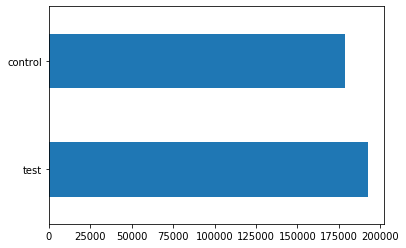

In [20]:
df["abtest"].value_counts().plot.barh()

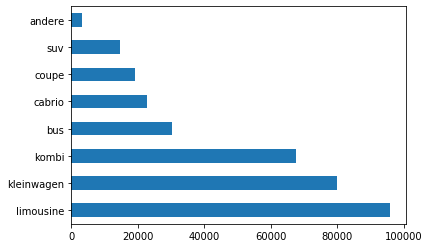

In [21]:
df["vehicleType"].value_counts().plot.barh()

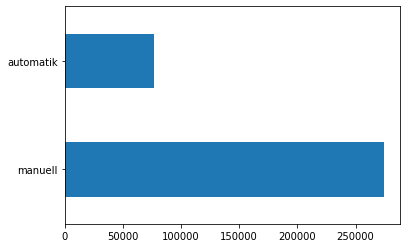

In [22]:
df["gearbox"].value_counts().plot.barh()

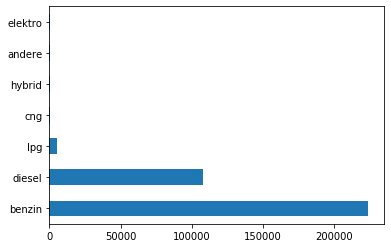

In [23]:
df["fuelType"].value_counts().plot.barh()

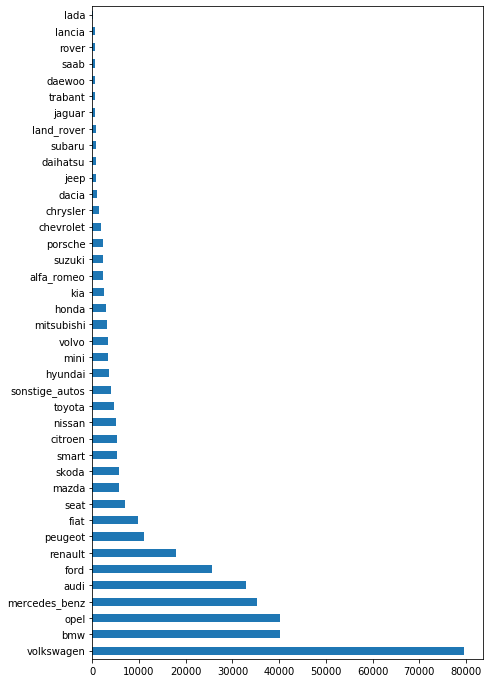

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,12))
df["brand"].value_counts().plot.barh()

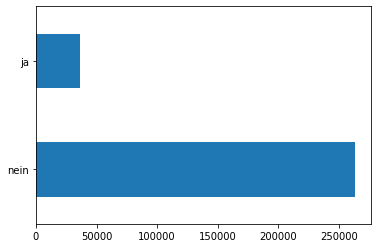

In [25]:
df["notRepairedDamage"].value_counts().plot.barh()

### 2.2) Missing Value 

In [26]:
import missingno as msno

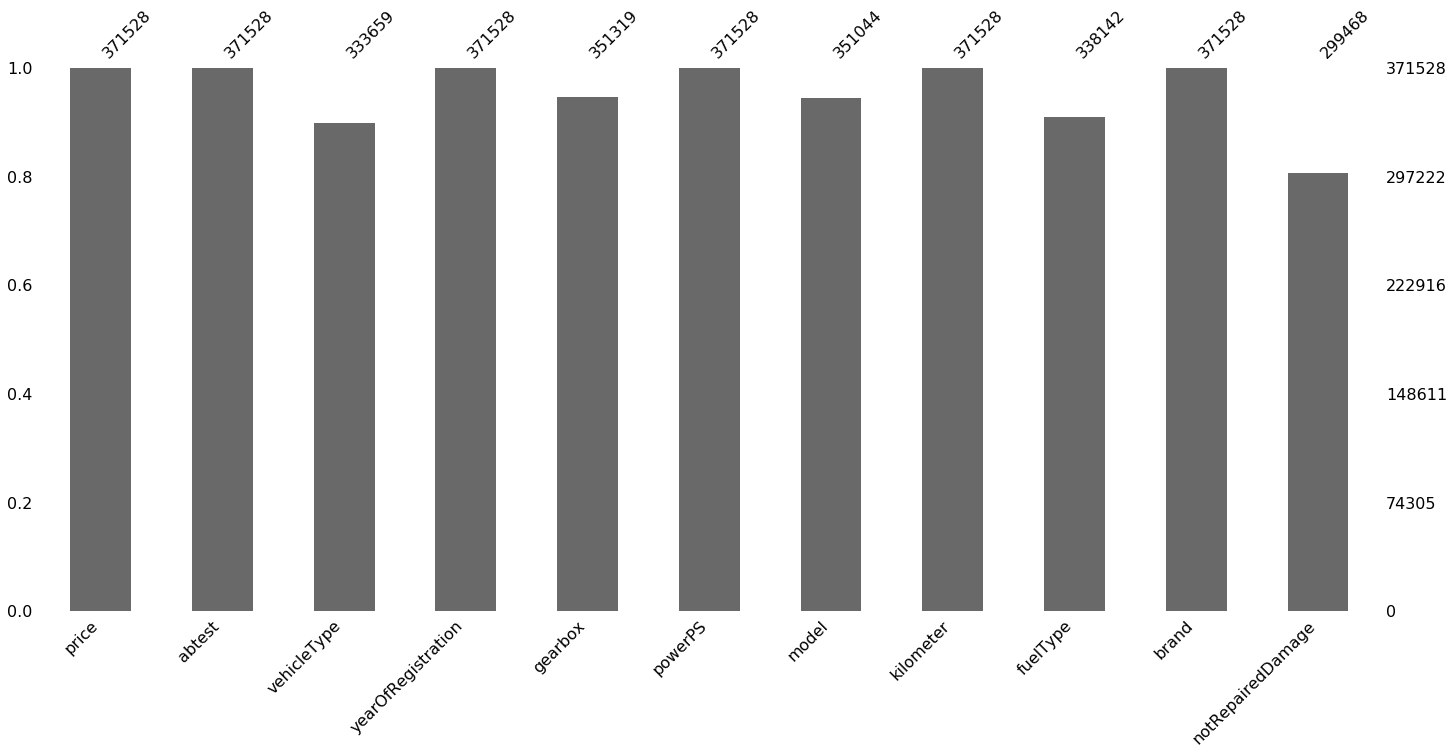

In [27]:
msno.bar(df) 

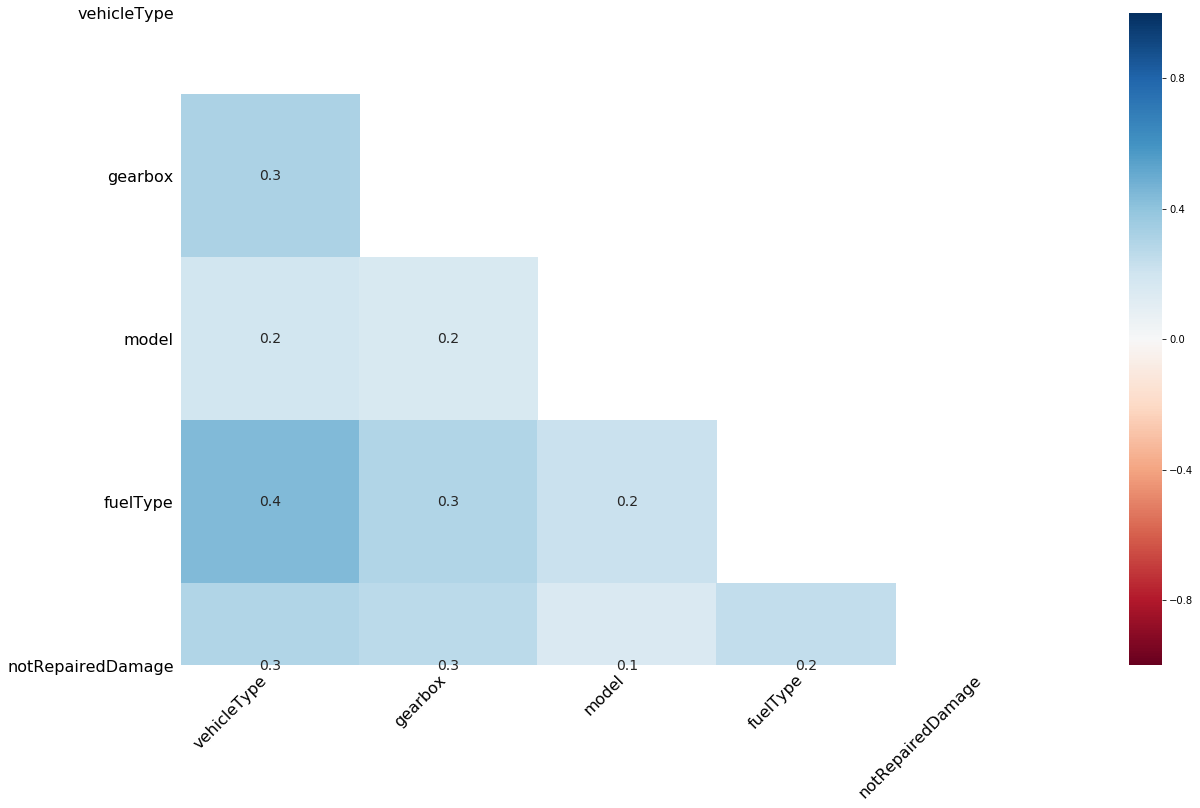

In [28]:
msno.heatmap(df)

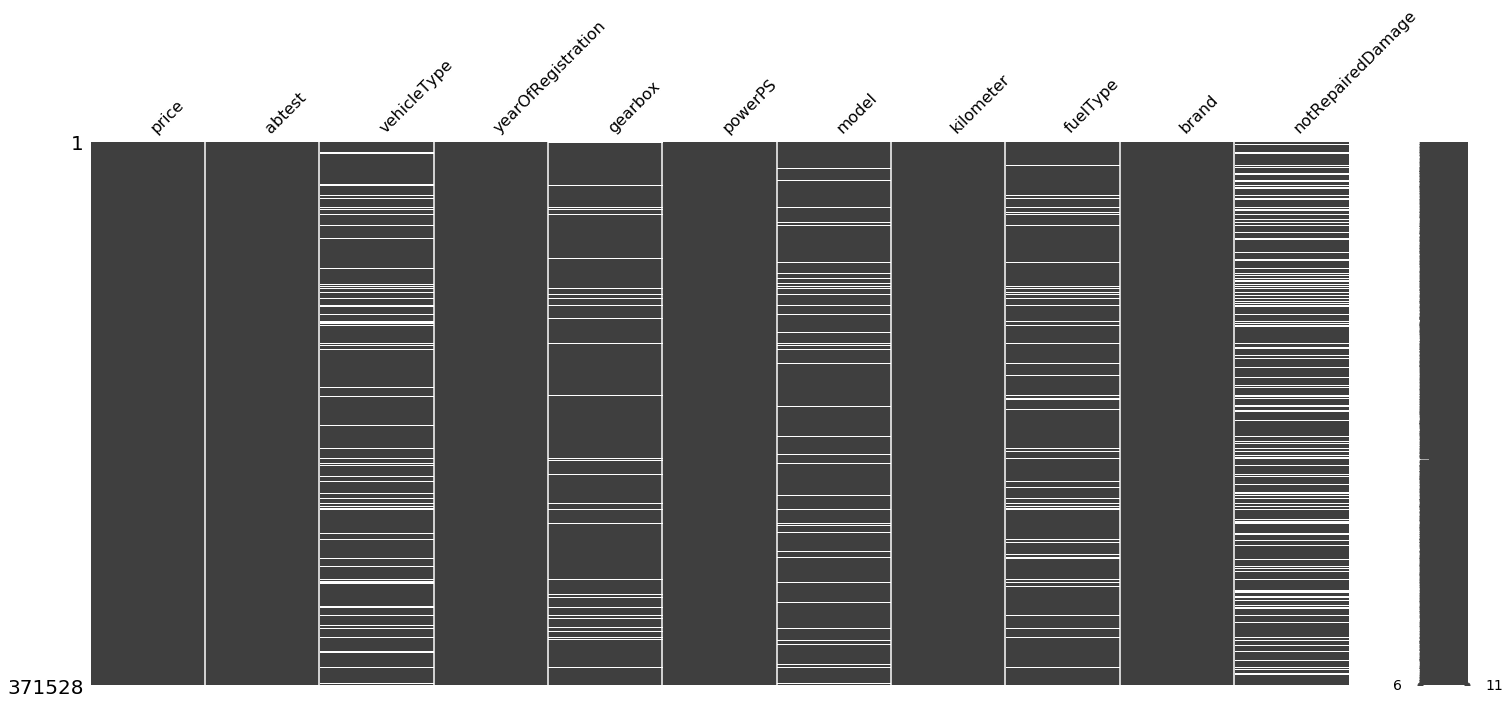

In [29]:
msno.matrix(df)

## 3) Aykırı Değer Temizleme(Outlier Cleaning)

In [30]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371526,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN


In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [32]:
print("Q1 : ", Q1)
print("Q3 : ", Q3)
print("IQR : ", IQR)

Q1 :  price                   1150.0
yearOfRegistration      1999.0
powerPS                   70.0
kilometer             125000.0
Name: 0.25, dtype: float64
Q3 :  price                   7200.0
yearOfRegistration      2008.0
powerPS                  150.0
kilometer             150000.0
Name: 0.75, dtype: float64
IQR :  price                  6050.0
yearOfRegistration        9.0
powerPS                  80.0
kilometer             25000.0
dtype: float64


In [33]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [34]:
alt_sinir

price                 -7925.0
yearOfRegistration     1985.5
powerPS                 -50.0
kilometer             87500.0
dtype: float64

In [35]:
ust_sinir

price                  16275.0
yearOfRegistration      2021.5
powerPS                  270.0
kilometer             187500.0
dtype: float64

### 3.1) Price

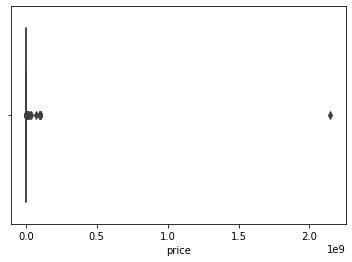

In [36]:
sns.boxplot(df.price)

In [37]:
df = df[(df["price"] < 200000) & (df["price"] > 100)]

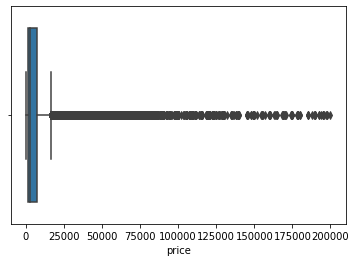

In [38]:
sns.boxplot(df.price)

### 3.2) yearOfRegistration

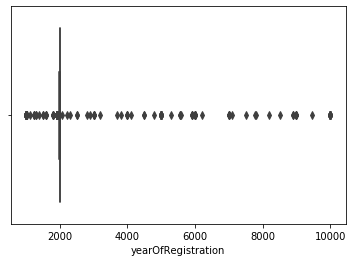

In [39]:
sns.boxplot(df.yearOfRegistration)

In [40]:
df = df[(df.yearOfRegistration <= 2020)  & (df.yearOfRegistration > 1950)]

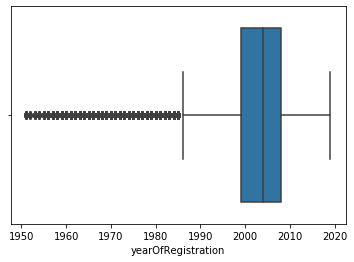

In [41]:
sns.boxplot(df.yearOfRegistration)

### 3.3) powerPS

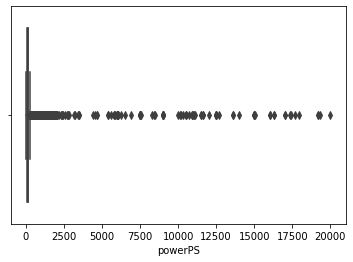

In [42]:
sns.boxplot(df.powerPS)

In [43]:
df = df[(df["powerPS"] <= 270) & (df["powerPS"] >= 50)]

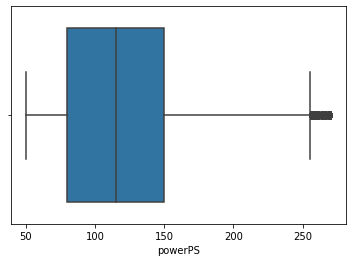

In [44]:
sns.boxplot(df.powerPS)

### 3.4) kilometer

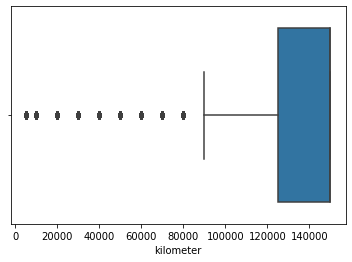

In [45]:
sns.boxplot(df.kilometer)

In [46]:
df['kilometer'].describe()

count    305790.000000
mean     126112.675365
std       38791.037468
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

In [47]:
df['kilometer'].max()

150000

In [48]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer
price,1.000000,0.377844,0.501513,-0.462994
yearOfRegistration,0.377844,1.000000,0.145553,-0.330930
powerPS,0.501513,0.145553,1.000000,0.016830
kilometer,-0.462994,-0.330930,0.016830,1.000000


## 4) Eksik Veri Doldurma

In [49]:
df.isnull().sum()

price                     0
abtest                    0
vehicleType           20240
yearOfRegistration        0
gearbox                5500
powerPS                   0
model                 11456
kilometer                 0
fuelType              18531
brand                     0
notRepairedDamage     44752
dtype: int64

### 4.1) vehicleType

In [74]:
df["vehicleType"].value_counts()

limousine     83333
kleinwagen    82708
kombi         63224
bus           27453
cabrio        19583
coupe         14557
suv           12356
andere         2354
Name: vehicleType, dtype: int64

In [75]:
vehicleType = df["vehicleType"].unique()
fuelType = df["fuelType"].unique()
print(fuelType)
print(vehicleType)

['diesel' 'benzin' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
['coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'andere'
 nan]


In [76]:
import numpy as np
vehicleType = np.delete(vehicleType,0)

In [77]:
df["vehicleType"].isnull().sum()

222

In [78]:
d = {}
for i in fuelType :
    m = 0
    for j in vehicleType :
        if df[(df.vehicleType == j) & (df.fuelType == i)].shape[0] > m :
            m = df[(df.vehicleType == j) & (df.fuelType == i)].shape[0]
            d[i] = j

In [79]:
for i in fuelType :
    df.loc[(df.fuelType == i) & (df.vehicleType.isnull()) ,"vehicleType" ] = d[i]

In [80]:
df["vehicleType"].isnull().sum()

0

### 4.2) gearbox

In [59]:
df["gearbox"].value_counts()

manuell      238203
automatik     62087
Name: gearbox, dtype: int64

In [60]:
gearbox = df["gearbox"].unique()
brand = df["brand"].unique()
d = {}

for i in brand :
    m = 0
    for j in gearbox :
        if df[(df.gearbox == j) & (df.brand == i)].shape[0] > m :
            m = df[(df.gearbox == j) & (df.brand == i)].shape[0]
            d[i] = j

In [61]:
for i in brand :
    df.loc[(df.brand == i) & (df.gearbox.isnull()) ,"gearbox" ] = d[i]

In [62]:
df["gearbox"].isnull().sum()

0

### 4.3) model

In [63]:
df["model"].value_counts()

golf               26362
andere             20256
3er                17988
polo               10138
astra               9350
                   ...  
samara                 5
rangerover             4
serie_3                3
601                    1
discovery_sport        1
Name: model, Length: 250, dtype: int64

In [64]:
df["model"].fillna("golf",inplace =True)

In [65]:
df["model"].isnull().sum()

0

### 4.4) fuelType

In [66]:
df["fuelType"].value_counts()

benzin     186129
diesel      96002
lpg          4308
cng           500
hybrid        229
andere         55
elektro        36
Name: fuelType, dtype: int64

In [67]:
df["fuelType"].fillna("benzin",inplace = True)

In [68]:
df["fuelType"].isnull().sum()

0

### 4.5) notRepairedDamage

In [69]:
df["notRepairedDamage"].value_counts()

nein    233036
ja       28002
Name: notRepairedDamage, dtype: int64

In [70]:
df["notRepairedDamage"].fillna("nein",inplace = True)

In [71]:
df["notRepairedDamage"].isnull().sum()

0

In [210]:
df.isnull().sum()

price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

## 5) Model

### 5.1) scikit-learn

In [81]:
from sklearn import preprocessing

In [82]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1,18300,test,coupe,2011,manuell,190,golf,125000,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,nein
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja
...,...,...,...,...,...,...,...,...,...,...,...
371519,5250,control,kleinwagen,2016,automatik,150,159,150000,benzin,alfa_romeo,nein
371520,3200,control,limousine,2004,manuell,225,leon,150000,benzin,seat,ja
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein


In [83]:
df_fit = df.apply(preprocessing.LabelEncoder().fit_transform)

In [84]:
df_fit

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
1,3385,1,3,60,1,140,118,11,3,1,0
2,2433,1,7,53,0,113,119,11,3,14,1
3,592,1,4,50,1,25,118,12,1,38,1
4,1204,1,4,57,1,19,103,9,3,31,1
5,262,1,6,44,1,52,11,12,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
371519,1607,0,4,65,0,100,4,12,1,0,1
371520,1103,0,6,53,1,175,142,12,1,30,0
371524,476,1,2,49,0,51,108,11,1,32,1
371525,2337,1,1,45,1,52,224,12,3,38,1


In [115]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [118]:
X = df_fit.drop('price', axis=1)
y = df_fit["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [121]:
model.intercept_

-322.2204692566129

In [122]:
model.coef_

array([ 3.13408120e+00, -3.36013550e+01,  3.62278577e+01, -8.69953267e+01,
        1.05057216e+01,  8.69734002e-02, -1.40797866e+02,  1.45118560e+02,
        3.71027420e+00,  4.74401684e+02])

In [131]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [124]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [125]:
rmse

614.8312282776078

In [126]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [127]:
rmse

612.7466428347991

In [129]:
model.score(X_train, y_train)

0.6397028406056023

In [132]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.6396130783123575

In [133]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean() # rmse gerçek eğitim hatası

614.861168636786

In [135]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean() # rmse gerçek test hatası

612.8209919590083

In [136]:
pd.DataFrame({"gercek_test":y_test,"tahmin_test":model.predict(x_test)})

,gercek_test,tahmin_test
186984,74,1391.450062
144974,1316,656.133190
296246,1531,481.003183
204243,2738,1261.637558
12864,1681,2087.101922
...,...,...
238676,555,1309.039717
141775,912,2759.299689
128201,1432,3728.563036
187235,1542,573.660100


### 5.2) Statsmodels

In [137]:
import statsmodels.api as sm

In [138]:
lm = sm.OLS(y_train, X_train)

In [139]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          1.700e+05
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:09:58   Log-Likelihood:                     -1.9182e+06
No. Observations:              244632   AIC:                                  3.837e+06
Df Residuals:                  244622   BIC:                                  3.837e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
abtest                -2.2054      2.479     -0.890      0.374      -7.065       2.654
vehicleType          -38.1464      0.744    -51.250      0.000     -39.605     -36.688
yearOfRegistration    32.7684      0.124    263.941      0.000      32.525      33.012
gearbox             -105.2682      3.326    -31.652      0.000    -111.787     -98.750
powerPS               10.4133      0.031    331.750      0.000      10.352      10.475
model                  0.0601      0.020      2.946      0.003       0.020       0.100
kilometer           -147.0544      0.396   -370.979      0.000    -147.831    -146.277
fuelType             147.4942      1.250    117.991      0.000     145.044     149.944
brand                  3.3332      0.110     30.393      0.000       3.118       3.548
notRepairedDamage    450.9689      4.217    106.936      0.000     442.703     459.234
==============================================================================
Omnibus:                    22731.366   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145469.783
Skew:                           0.198   Prob(JB):                         0.00
Kurtosis:                       6.757   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [141]:
rmse

615.4737129347563

In [142]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [143]:
rmse

613.123193305216

In [150]:
model.mse_model

64399337688.51482

#### abtest kaldırılınca

In [153]:
X = df_fit.drop(columns = ['price', 'abtest'], axis=1)
y = df_fit["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20)

In [154]:
lm = sm.OLS(y_train, X_train)

In [155]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                          1.890e+05
Date:                Sun, 19 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:22:53   Log-Likelihood:                     -1.9182e+06
No. Observations:              244632   AIC:                                  3.836e+06
Df Residuals:                  244623   BIC:                                  3.837e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
vehicleType          -37.5397      0.744    -50.460      0.000     -38.998     -36.082
yearOfRegistration    32.6646      0.123    264.719      0.000      32.423      32.906
gearbox             -107.1841      3.322    -32.265      0.000    -113.695    -100.673
powerPS               10.4170      0.031    332.015      0.000      10.356      10.478
model                  0.0777      0.020      3.815      0.000       0.038       0.118
kilometer           -147.3385      0.395   -372.853      0.000    -148.113    -146.564
fuelType             148.9446      1.250    119.172      0.000     146.495     151.394
brand                  3.3087      0.109     30.236      0.000       3.094       3.523
notRepairedDamage    452.7669      4.218    107.331      0.000     444.499     461.035
==============================================================================
Omnibus:                    22536.426   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144099.528
Skew:                           0.191   Prob(JB):                         0.00
Kurtosis:                       6.741   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
pd.DataFrame({"gercek_test":y_test,"tahmin_test":model.predict(X_test)})

,gercek_test,tahmin_test
112130,808,1514.185492
327169,639,559.160692
11197,1726,1261.927466
60518,2832,2163.306740
160145,2714,569.135069
...,...,...
8833,759,920.558262
245119,1204,1625.498434
346332,1854,1187.036147
362811,1332,1268.764015


In [162]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [163]:
rmse

615.3944068851634

In [160]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [161]:
rmse

613.460045284633

In [164]:
np.sqrt(np.mean((y_test - model.predict(X_test))**2))

613.4600452846357